Python Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Read and Edit CSV file

In [8]:
df = pd.read_csv("dataset.csv")

features = ["fan_in", "fan_out", "gate_count", "logic_levels", "wire_delay"]
target = "combinational_depth"

df.fillna(df.median(), inplace=True)

Training & Testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-Squared Score: {r2:.4f}")

new_sample = np.array([[3, 5, 100, 10, 0.5]]) 
new_sample_df = pd.DataFrame(new_sample, columns=features) 
new_sample_scaled = scaler.transform(new_sample_df)
predicted_depth = model.predict(new_sample_scaled)
print(f"Predicted Logic Depth: {predicted_depth[0]:.2f}")

Mean Squared Error: 0.0727
Root Mean Squared Error: 0.2696
Mean Absolute Error: 0.2159
R-Squared Score: 0.9989
Predicted Logic Depth: 12.00


Graphical Representations

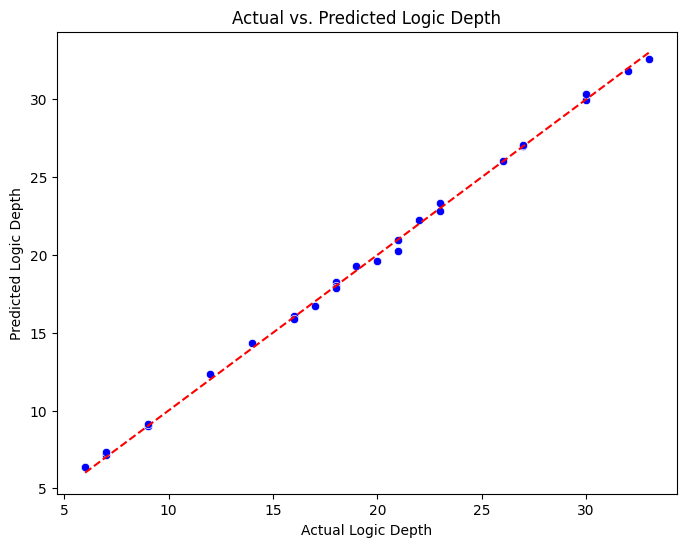

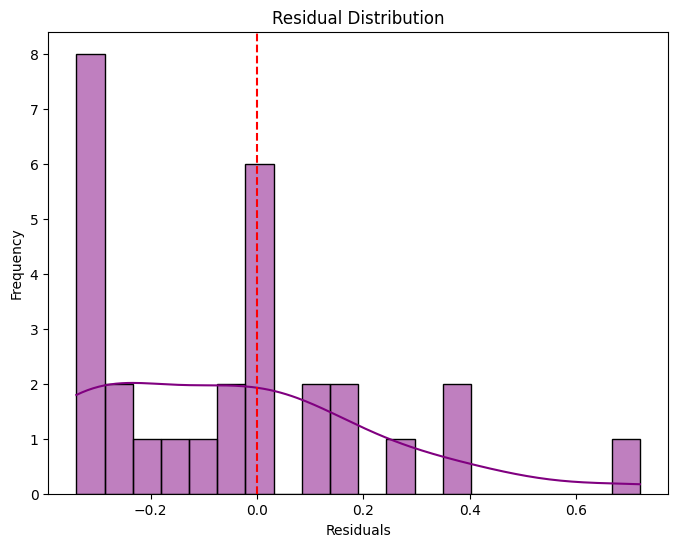

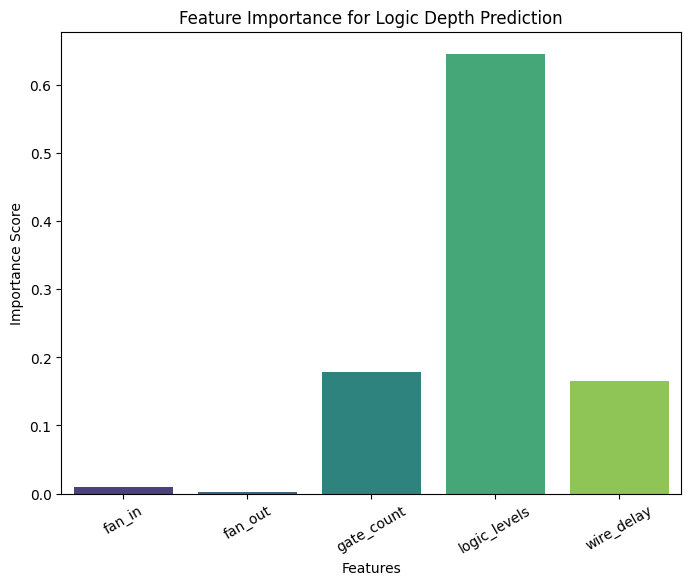

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')  
plt.xlabel("Actual Logic Depth")
plt.ylabel("Predicted Logic Depth")
plt.title("Actual vs. Predicted Logic Depth")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color="purple")
plt.axvline(0, color='r', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

feature_importance = model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=features, y=feature_importance, hue=features, palette="viridis")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for Logic Depth Prediction")
plt.xticks(rotation=30)
plt.show()